# Calibration of the logistic growth model: linear least squares

In this example, we perform the calibration of the logistic growth model with linear least squares.

## Read the data

In [1]:
import openturns as ot
import numpy as np
import CalibrationAnalysis as ca

The data in the file is based on 22 dates from 1790 to 2000.

In [2]:
observedSample = ot.Sample_ImportFromCSVFile("calibration_logistic_observations.csv")
nbobs = observedSample.getSize()
nbobs

22

In [3]:
timeObservations = ot.Sample(observedSample[:,0].asPoint(),nbobs)
timeObservations

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=1 dimension=22 data=[[1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000]]

In [4]:
populationObservations = ot.Sample(observedSample[:,1].asPoint(),nbobs)
populationObservations

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=1 dimension=22 data=[[3.9,5.3,7.2,9.6,13,17,23,31,39,50,62,76,92,106,123,132,151,179,203,221,250,281]]

The `logisticModel` function takes a dimension 24 vector as input and returns a dimension 22 vector. The first 22 components of the input vector contains the dates and the remaining 2 components are $a$ and $b$. 

In [5]:
def logisticModel(X):
    nbdates = 22
    t = [X[i] for i in range(nbdates)]
    a = X[22]
    c = X[23]
    t0 = 1790.
    y0 = 3.9e6
    b = np.exp(c)
    y = ot.Point(nbdates)
    for i in range(nbdates):
        y[i] = a*y0/(b*y0+(a-b*y0)*np.exp(-a*(t[i]-t0)))
    z = y/1.e6 # Convert into millions
    return z

In [6]:
logisticModelPy = ot.PythonFunction(24,22,logisticModel)

The reference values of the parameters. 

In [7]:
a=0.03134
c=-22.58
thetaPrior = [a,c]

In [8]:
logisticParametric = ot.ParametricFunction(logisticModelPy,[22,23],thetaPrior)

Check that we can evaluate the parametric function.

In [9]:
populationPredicted = logisticParametric(timeObservations)
populationPredicted

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=1 dimension=22 description=[y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21] data=[[3.9,5.29757,7.17769,9.69198,13.0277,17.4068,23.0769,30.2887,39.2561,50.0977,62.7691,77.0063,92.311,108.001,123.322,137.59,150.3,161.184,170.193,177.442,183.144,187.55]]

##  Calibration

In [10]:
algo = ot.LinearLeastSquaresCalibration(logisticParametric, timeObservations, populationObservations, thetaPrior)

In [11]:
algo.run()

In [12]:
calibrationResult = algo.getResult()

In [13]:
thetaMAP = calibrationResult.getParameterMAP()
thetaMAP

class=Point name=Unnamed dimension=2 values=[0.0265958,-23.1714]

In [14]:
thetaPosterior = calibrationResult.getParameterPosterior()
thetaPosterior.computeBilateralConfidenceIntervalWithMarginalProbability(0.95)[0]

class=Interval name=Unnamed dimension=2 lower bound=class=Point name=Unnamed dimension=2 values=[0.0246466,-23.3182] upper bound=class=Point name=Unnamed dimension=2 values=[0.0285451,-23.0247] finite lower bound=[1,1] finite upper bound=[1,1]

In [15]:
mypcr = ca.CalibrationAnalysis(calibrationResult,logisticParametric, timeObservations, populationObservations)

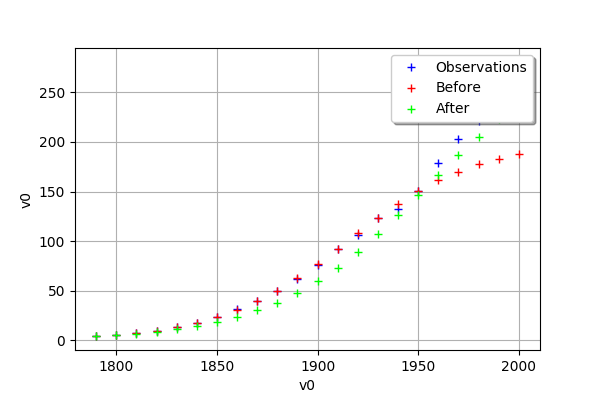

In [16]:
mypcr.drawObservationsVsInputs()

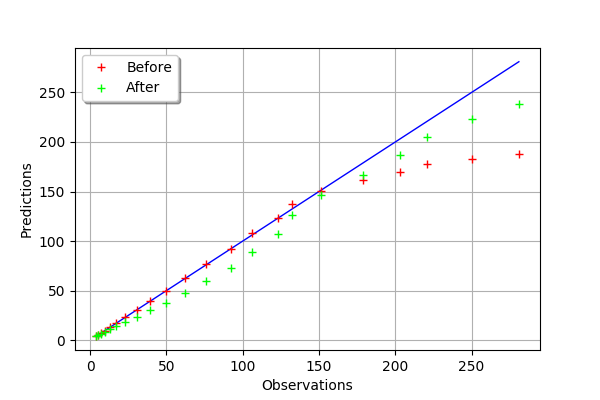

In [17]:
mypcr.drawObservationsVsPredictions()

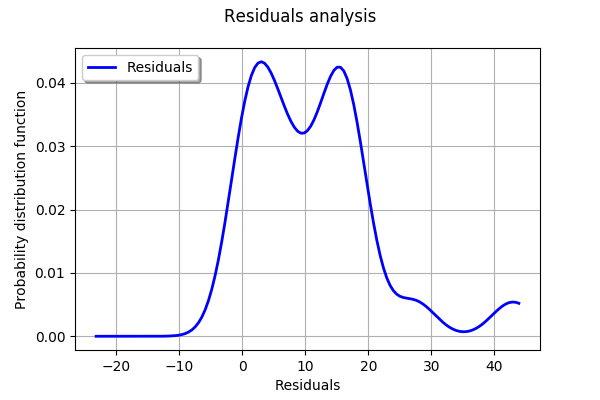

In [18]:
mypcr.drawResiduals()

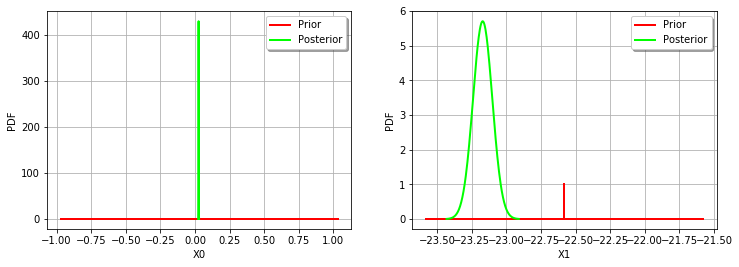

In [19]:
_ = mypcr.drawParameterDistributions()